In [1]:
import docx
import astropy.units as units
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%load_ext autoreload

In [2]:
%config InlineBackend.figure_format = 'retina'
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f9db2cb4710>

In [3]:
%autoreload 2
import pyfcctab

In [4]:
path = "/users/livesey/corf/"
tables = pyfcctab.read(filename='/users/livesey/corf/fcctable.docx',
                  skip_additionals=False)
pyfcctab.save(tables)
# tables = pyfcctab.load(path+"fcctables.pickle")

Reading tables: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, done.
Digesting: R1, R2, R3, F, NF, done.
Injecting additions in: ITU-R1, ITU-R2, ITU-R3, F, NF, done.
Merging: ITU, USA, all, done.
Footnote definitions: reading, appending, done.


In [10]:
fixed = pyfcctab.BandCollection(
    [b for b in tables.itu if b.has_allocation("Fixed*")])
fixed.metadata["label"] = "Fixed"

eess = pyfcctab.BandCollection(
    [b for b in tables.itu if b.has_allocation("Earth Exploration*", but_not="(*to*)")])
eess.metadata["label"] = "EESS"

ras = pyfcctab.BandCollection(
    [b for b in tables.itu if b.has_allocation("Radio Astronomy*")])
ras.metadata["label"] = "RAS"

science = ras.union(eess)
science.metadata["label"] = "Science"

aep = pyfcctab.BandCollection(
    [b for b in tables.itu if b.has_footnote("5.340*")])
aep.metadata["label"] = "5.340"

fss = pyfcctab.BandCollection(
        [b for b in tables.itu if b.has_allocation("Fixed-Satellite*")])
fss.metadata["label"] = "FSS"

mss = pyfcctab.BandCollection(
        [b for b in tables.itu if b.has_allocation("Mobile-Satellite*")])
mss.metadata["label"] = "MSS"


In [11]:
stitched_fixed = tables.itu.stitch(lambda b:b.has_allocation("Fixed*"))
print (len(fixed))
print (len(stitched_fixed))

575
80


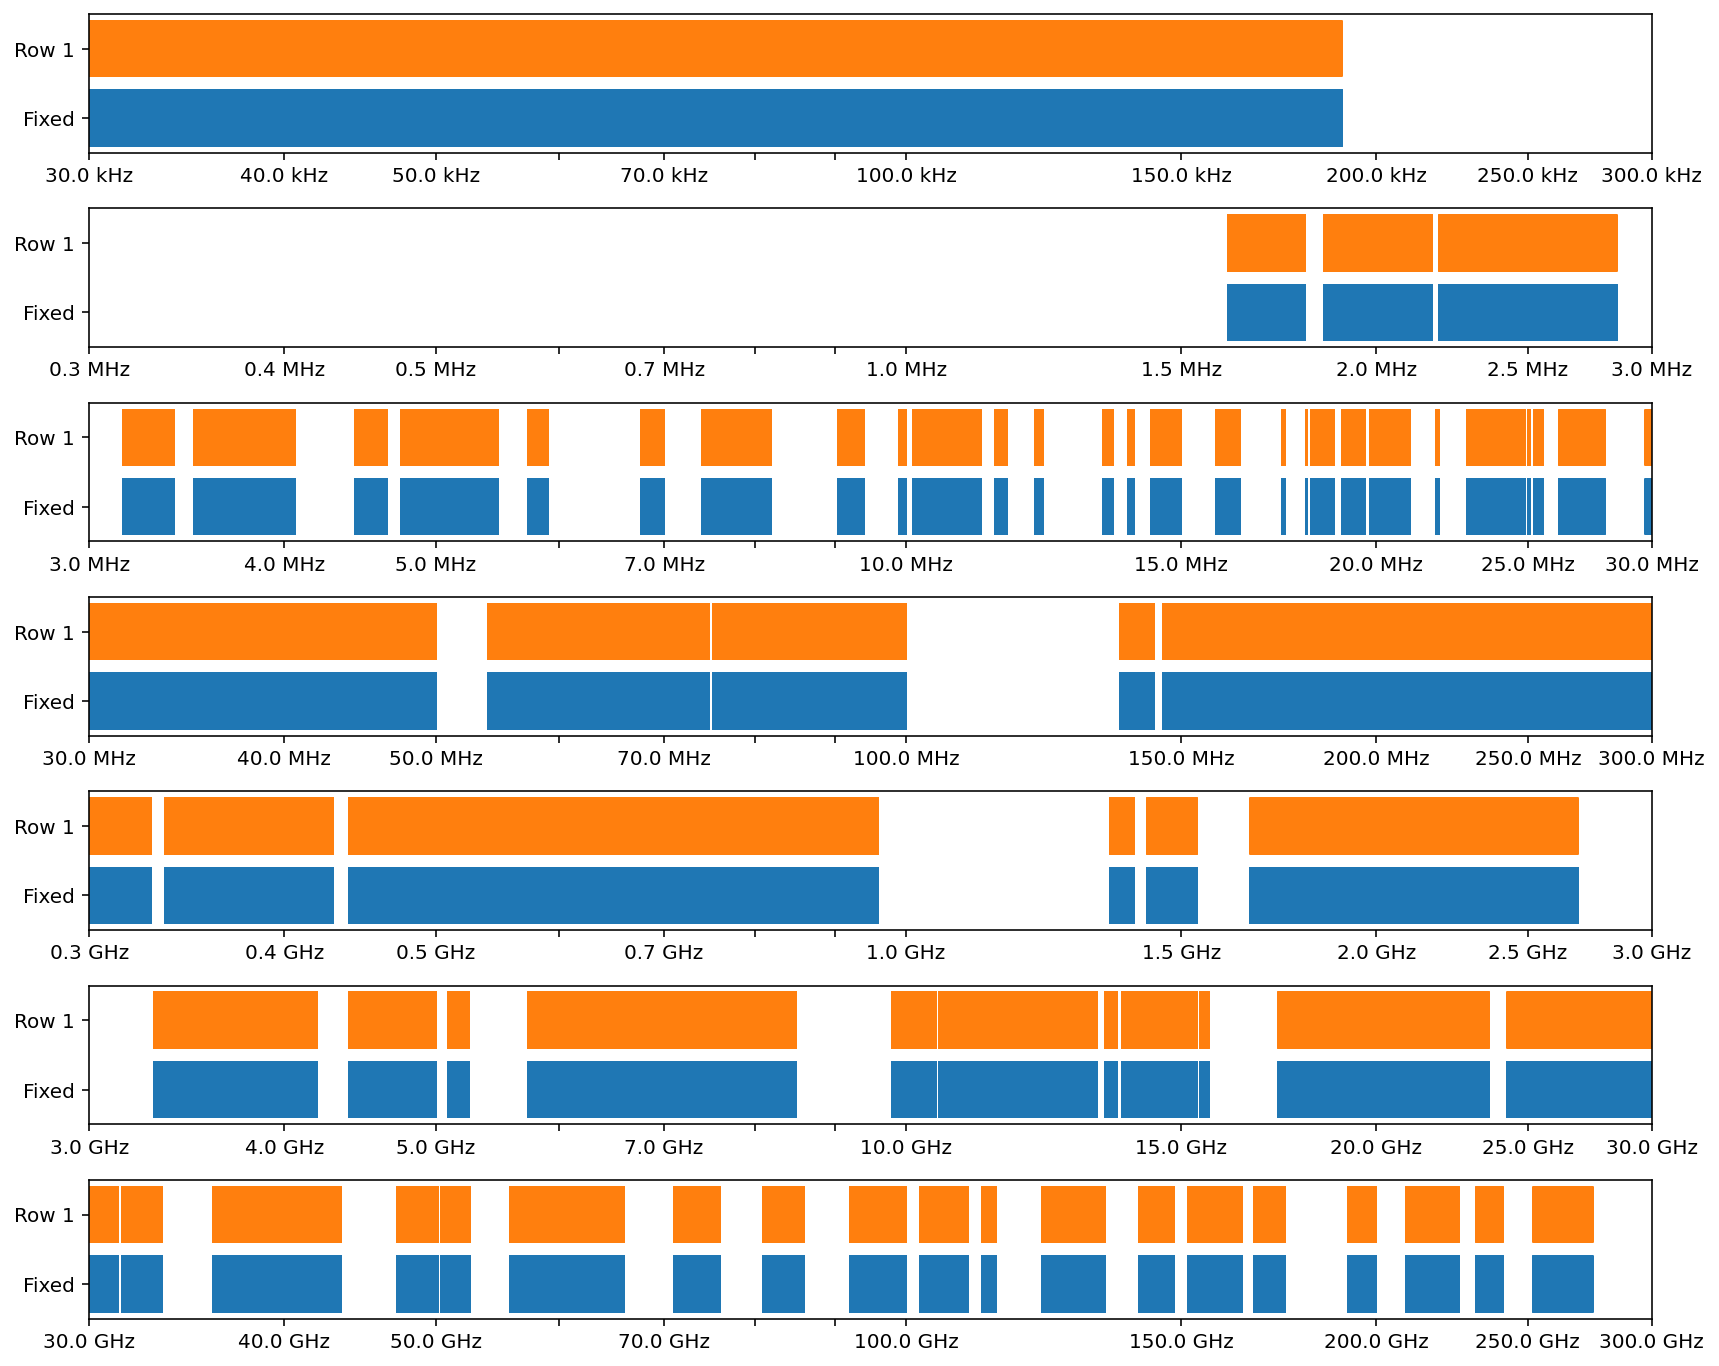

In [12]:
pyfcctab.plot_bands(fixed, stitched_fixed)

In [ ]:
bands = tables.all.get_bands(30.0*units.GHz, 35.0*units.GHz)

In [ ]:
dummy=pyfcctab.htmltable(bands, append_footnotes=True)